<a href="https://colab.research.google.com/github/medinadiegoeverardo/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/module3-introduction-to-bayesian-inference/medinadiego_LS_DS_133_Introduction_to_Bayesian_Inference_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 133

## Introduction to Bayesian Inference




## Assignment - Code it up!

Most of the above was pure math - now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up, and as a stretch goal - refactor your code into helpful reusable functions!

Specific goals/targets:

1. Write a function `def prob_drunk_given_positive(prob_drunk_prior, prob_positive, prob_positive_drunk)` that reproduces the example from lecture, and use it to calculate and visualize a range of situations
2. Explore `scipy.stats.bayes_mvs` - read its documentation, and experiment with it on data you've tested in other ways earlier this week
3. Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach
4. In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/) - you could and should create something similar!

Stretch goals:

- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!

# Bayesian

In [0]:
# np.linspace(1, 3, 50) > 1.1, 1.3, 1.5, ... 2.5, 2.8, 3.0 (50 total)
# P(prob_positive_given_drunk) = prob_drunk_given_positive | prob_drunk_prior


def prob_x_given_y(prob_y_given_x, prior_belief):
    results = []
    for i in range(1000):
        prior_inverse = (prob_y_given_x*prior_belief)
        non_y = 1 - prob_y_given_x
        non_prior = 1 - prior_belief
        final_bot = (prob_y_given_x * prior_belief) + (non_y * non_prior)
        f_probability = prior_inverse/final_bot
        results.append(f_probability)
        prior_belief = f_probability
    return results

results = prob_x_given_y(.99, .005)
# prob_x_given_y(.99, .005)

In [0]:
results

In [0]:
import scipy.stats as stats
import numpy as np

def confidence_interval(data, confidence=0.95):
  """
  Calculate a confidence interval around a sample mean for given data.
  Using t-distribution and two-tailed test, default 95% confidence. 
  
  Arguments:
    data - iterable (list or numpy array) of sample observations
    confidence - level of confidence for the interval
  
  Returns:
    tuple of (mean, lower bound, upper bound)
  """
  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  # stderr = stats.sem(data)
  stderr = np.std(data, ddof=1) / np.sqrt(n)
  margin_of_error = stderr * stats.t.ppf((1 + confidence) / 2.0, n - 1)
  print(margin_of_error)
  return (mean, mean - margin_of_error, mean + margin_of_error)

In [154]:
confidence_interval(results) # confidence interval, mean, - margin of error, + margin of error

0.013252160496941053


(0.9931210762296897, 0.9798689157327487, 1.0063732367266307)

In [116]:
stats.bayes_mvs(results, alpha=.95)

(Mean(statistic=0.9931210762296897, minmax=(0.9798689157327487, 1.0063732367266307)),
 Variance(statistic=0.004552589822425905, minmax=(0.0034386729051520096, 0.0060195571224397155)),
 Std_dev(statistic=0.0672992099220651, minmax=(0.05864019871344238, 0.07758580490295705)))

In [0]:
results = np.array(results)

0.013252160496941053


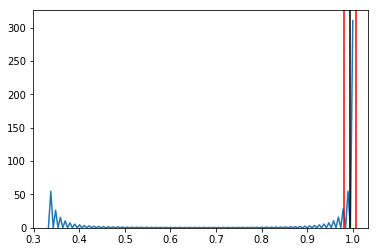

In [155]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(results)
CI = confidence_interval(results)
plt.axvline(x=CI[1], color='red')
plt.axvline(x=CI[2], color='red')
plt.axvline(x=CI[0], color='black');

# Frequentist

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

drunk_positive_lst = []
for x in range(1000):
  drunk_positive = np.random.binomial(n=1, p=.95, size=100)
  one_sample = drunk_positive
  drunk_positive_lst.append(drunk_positive.mean())

In [118]:
len(drunk_positive_lst)

100

In [108]:
type(drunk_positive_lst)

list

In [119]:
confidence_interval(drunk_positive_lst) # confidence interval, mean, - margin of error, + margin of error

0.004215815483068296


(0.9497, 0.9454841845169317, 0.9539158154830683)

In [120]:
stats.bayes_mvs(drunk_positive_lst, alpha=.95)

(Mean(statistic=0.9497, minmax=(0.9454841845169317, 0.9539158154830683)),
 Variance(statistic=0.0004607319587628857, minmax=(0.0003480011520764088, 0.0006091922294965039)),
 Std_dev(statistic=0.021409418581460428, minmax=(0.018654788985041047, 0.024681819817357547)))

In [124]:
# from scipy.stats import t, ttest_1samp
# ttest_1samp(drunk_positive_lst, .9)

Ttest_1sampResult(statistic=23.39181657405187, pvalue=4.072896211481714e-42)

# 3, 4

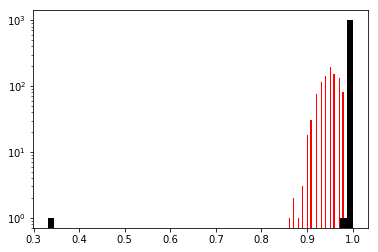

In [194]:
ax = plt.hist(drunk_positive_lst, bins=50, stacked=True, log=True, histtype='barstacked', color='red')
ax = plt.hist(results, bins=50, color='black')

- The red histogram was produced using the Frequentist's approach. The black is the Bayesian frequency, of course. Although in the end they both end up with similar means and margins of error, it seems like in the process of getting to the last trial, a lot more variance was produced with the Frequentist, yet a lot less of it with the Bayesian (more concentration). I think this is because the Bayesian "builds" upon prior belief, as opposed to the Frequentist, who treats every trial as the independent. There is recursion in beliefs with the Bayesian, meaning that with enough trials, all probabilities will be 1.

In [0]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# sns.kdeplot(drunk_positive_lst)
# sns.kdeplot(results)
# CI = confidence_interval(drunk_positive_lst)
# plt.axvline(x=CI[1], color='red')
# plt.axvline(x=CI[2], color='red')
# plt.axvline(x=CI[0], color='black');

In [0]:
# fix, ax = plt.subplots()
# for sample in [drunk_positive_lst, results]:
#   sns.kdeplot(sample, shade=True)

## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)